# Numerical simulations of the Monty-Hall "paradox"
This short notebook aims at simulating trials of the so-called [Monty-Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem), and thus helping to convince about the result thanks to a numerical results rather than a possibly-unclear proof.

----
## Definition of the problem


There is $M \geq 3$ doors, and behind only one of them there is a treasure.
The goal of the player is to find the treasure, following this game:

1. The player first chose a door, but does not open it yet,
2. All remaining doors but one are opened, and none of them contain the treasure. The player sees $M - 2$ bad doors,
3. So there is just 2 doors, the one first chosen, and the last one. She knows the treasure is behind one of them,
4. And she has to decide if she wants to **stay on her initial choice**, or **switches to the last door**.

Finally, the chosen door is opened, and the player wins this round if she found the treasure.

---
The goal of this notebook is to numerically prove that the choice of always switching to the last door is the best one.

## Starting our numerical simulations
We start by importing some modules, then define a function, `randomAllocation()`, to generate a random allocation of treasures behind the `M` doors.

> *Note:* all the code below is generic for any $M \geq 3$, but `M = 3` is used to keep small and clear visualizations.

In [1]:
import random

In [2]:
M = 3
allocation = [False] * (M - 1) + [True]  # Only 1 treasure!
assert set(allocation) == {True, False}  # Check: only True and False
assert sum(allocation) == 1              # Check: only 1 treasure!

Just to check:

In [3]:
allocation

[False, False, True]

We can generate a random spot for the treasure by simply shuffling (with [`random.shuffle()`](https://docs.python.org/3/library/random.html#random.shuffle)):

In [4]:
def randomAllocation():
    r = allocation[:]
    random.shuffle(r)
    return r

Let us quickly check this function `randomAllocation()`:

In [5]:
for _ in range(10):
    print(randomAllocation())

[False, True, False]
[False, False, True]
[False, False, True]
[True, False, False]
[False, False, True]
[False, True, False]
[True, False, False]
[False, True, False]
[False, True, False]
[True, False, False]


We need to write a small function to simulate the choice of the door to show to the player, `show()`:

In [6]:
def last(r, i):
    # Select a random index corresponding of the door we keep
    if r[i]:  # She found the treasure, returning a random last door
        return random.choice([j for (j, v) in enumerate(r) if j != i])
    else:     # She didn't find the treasure, returning the treasure door
        # Indeed, the game only removes door that don't contain the treasure
        return random.choice([j for (j, v) in enumerate(r) if j != i and v])

In [7]:
for _ in range(10):
    r = randomAllocation()
    i = random.randint(0, M - 1)
    j = last(r, i)
    print("- r =", r, "i =", i, "and last(r, i) =", j)
    print("  Stay on", r[i], "or go to", r[j], "?")

- r = [False, False, True] i = 0 and last(r, i) = 2
  Stay on False or go to True ?
- r = [True, False, False] i = 1 and last(r, i) = 0
  Stay on False or go to True ?
- r = [False, False, True] i = 1 and last(r, i) = 2
  Stay on False or go to True ?
- r = [True, False, False] i = 1 and last(r, i) = 0
  Stay on False or go to True ?
- r = [False, False, True] i = 1 and last(r, i) = 2
  Stay on False or go to True ?
- r = [False, False, True] i = 0 and last(r, i) = 2
  Stay on False or go to True ?
- r = [False, True, False] i = 2 and last(r, i) = 1
  Stay on False or go to True ?
- r = [True, False, False] i = 1 and last(r, i) = 0
  Stay on False or go to True ?
- r = [False, False, True] i = 0 and last(r, i) = 2
  Stay on False or go to True ?
- r = [False, True, False] i = 1 and last(r, i) = 2
  Stay on True or go to False ?


We need a function to simulate the first choice of the player, and a simple choice is to select a uniform choice:

In [8]:
def firstChoice():
    global M
    # Uniform first choice
    return random.randint(0, M - 1)

Now we can simulate a game, for a certain left-to-be-written function `strategy()` that decides to keep or to change the initial choice.

In [9]:
def simulate(stayOrNot):
    # Random spot for the treasure
    r = randomAllocation()
    # Initial choice
    i = firstChoice()
    # Which door are remove, or equivalently which is the last one to be there?
    j = last(r, i)
    assert {r[i], r[j]} == {False, True}  # There is still the treasure and only one
    stay = stayOrNot()
    if stay:
        return r[i]
    else:
        return r[j]

We can simulate many outcome of the game for one strategy, and return the number of time it won (i.e. average number of time it found the good door, by finding `r[i] = True` or `r[j] = True`):

In [10]:
N = 10000

def simulateManyGames(stayOrNot):
    global N
    results = [simulate(stayOrNot) for _ in range(N)]
    return sum(results)

----
## Comparing two strategies, on many randomized trials
We will simulate the two strategies, `keep()` vs `change()`, on $N = 10000$ randomized games.

### Keeping our first choice, `keep()`

In [11]:
def keep():
    return True  # True == also stay on our first choice

In [12]:
rate = simulateManyGames(keep)
print("- For", N, "simulations, the strategy 'keep' has won", rate, "of the trials...")
print("  ==> proportion = {:.2%}.".format(rate / float(N)))

- For 10000 simulations, the strategy 'keep' has won 3280 of the trials...
  ==> proportion = 32.80%.


$\implies$ We find a chance of winning of about $\frac{1}{M} = \frac{1}{3}$ for this strategy, which is very logical as only the initial choice matters, and due to the uniform location of the treasure behind the $M = 3$ doors, and the uniform first choice with `firstChoice()`.

### Changing our first choice, `change()`

In [13]:
def change():
    return False  # False == never stay, ie always chose the last door

In [14]:
rate = simulateManyGames(change)
print("- For", N, "simulations, the strategy 'change' has won", rate, " of the trials...")
print("  ==> proportion = {:.2%}.".format(rate / float(N)))

- For 10000 simulations, the strategy 'change' has won 6693  of the trials...
  ==> proportion = 66.93%.


$\implies$ We find a chance of winning of about $\frac{M - 1}{M} = \frac{2}{3}$ for this strategy, which is less logical.

Due to the uniform location of the treasure behind the $M = 3$ doors, and the uniform first choice with `firstChoice()`, we have a $\frac{1}{M}$ chance of finding the treasure from the first time.

1. If we found it, the last door does not contain the treasure, hence **we loose** as we switch to it,
2. However, if we did not find it, the last door has to contain the treasure, hence **we win** as we switch to it deterministically (i.e. always).

The first case has probability $\frac{1}{M}$, probability of loosing, and the second case has probability $\frac{M - 1}{M}$, probability of loosing.

$\implies$ Conclusion : this strategy `change()` has a chance of winning of $\frac{2}{3}$, far better than the chance of $\frac{1}{3}$ for `stay()`.

> We proved numerically the results given and explained [here on the Wikipedia page](https://en.wikipedia.org/wiki/Monty_Hall_problem#Direct_calculation). Great!

### Bernoulli choice
We can try a randomized strategy, a simple one can be to follow the decision of a (biased) coin:

1. Toss a coin (with fixed head probability equals to $p \in [0, 1]$)
2. If head, switch to the last door.

In [15]:
def bernoulli(p=0.5):
    return random.random() < p

In [16]:
rate = simulateManyGames(bernoulli)
print("- For", N, "simulations, the strategy 'bernoulli' has won", rate, " of the trials...")
print("  ==> proportion = {:.2%}.".format(rate / float(N)))

- For 10000 simulations, the strategy 'bernoulli' has won 5077  of the trials...
  ==> proportion = 50.77%.


Now we can try different values for $p$, and plot the resulting chance of winning the game as a function of $p$.
Hopefully, it should be monotonic, confirming the result explained above.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

We generate lots of values for $p$, then a function `stratBernoulli()` to create the strategy described above, for some $p \in [0, 1]$.

In [18]:
values_p = np.linspace(0, 1, 500)

def stratBernoulli(p):
    def stayOrNot():
        return bernoulli(p=p)
    return stayOrNot

Let finally do all the simulations, and store the empirical probability of winning the game when following a Bernoulli strategy.

> This line takes about $4$ minutes on my laptop, it's not that quick.

In [19]:
chance_of_winning = [simulateManyGames(stratBernoulli(p)) / float(N) for p in values_p]

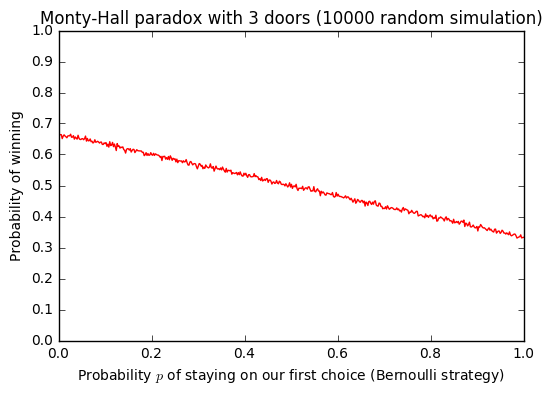

In [20]:
plt.figure()
plt.plot(values_p, chance_of_winning, 'r')
plt.title("Monty-Hall paradox with {} doors ({} random simulation)".format(M, N))
plt.xlabel("Probability $p$ of staying on our first choice (Bernoulli strategy)")
plt.ylabel("Probability of winning")
plt.ylim(0, 1)
plt.yticks(np.linspace(0, 1, 11))
plt.show()

---
## Examples with $M = 100$ doors

In [27]:
def completeSimu():
    global M
    global N
    allocation = [False] * (M - 1) + [True]  # Only 1 treasure!
    
    def randomAllocation():
        r = allocation[:]
        random.shuffle(r)
        return r
    
    def last(r, i):
        # Select a random index corresponding of the door we keep
        if r[i]:  # She found the treasure, returning a random last door
            return random.choice([j for (j, v) in enumerate(r) if j != i])
        else:     # She didn't find the treasure, returning the treasure door
            # Indeed, the game only removes door that don't contain the treasure
            return random.choice([j for (j, v) in enumerate(r) if j != i and v])
    
    def simulate(stayOrNot):
        # Random spot for the treasure
        r = randomAllocation()
        # Initial choice
        i = firstChoice()
        # Which door are remove, or equivalently which is the last one to be there?
        j = last(r, i)
        stay = stayOrNot()
        if stay:
            return r[i]
        else:
            return r[j]

    def simulateManyGames(stayOrNot):
        global N
        results = [simulate(stayOrNot) for _ in range(N)]
        return sum(results)

    values_p = np.linspace(0, 1, 300)
    chance_of_winning = [simulateManyGames(stratBernoulli(p)) / float(N) for p in values_p]
    plt.figure()
    plt.plot(values_p, chance_of_winning, 'r')
    plt.title("Monty-Hall paradox with {} doors ({} random simulation)".format(M, N))
    plt.xlabel("Probability $p$ of staying on our first choice (Bernoulli strategy)")
    plt.ylabel("Probability of winning")
    plt.ylim(0, 1)
    plt.yticks(np.linspace(0, 1, 11))
    plt.show()

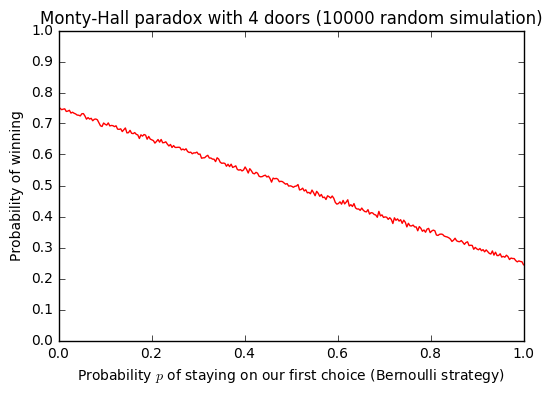

In [28]:
M = 4
completeSimu()

### Last plot, for $M = 100$
It clearly shows the linear behavior we expected.

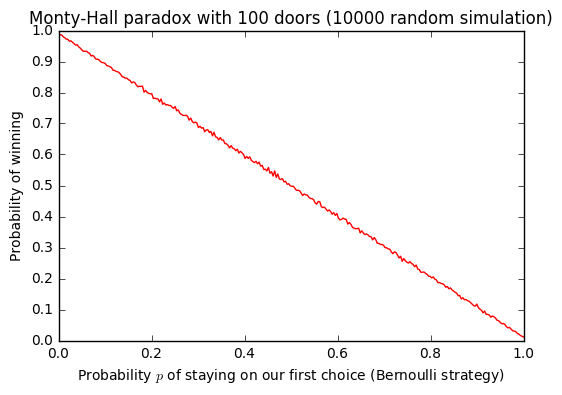

In [29]:
M = 100
completeSimu()

$\implies$ it is now clear that the best strategy is the **always change and select the other door**.

----
## Conclusion
As we saw it, it is clear from the numerical experiments presented above that the strategy of **always changing our first choice** (`change()`), is statistically better than the strategy of **keeping our first choice** (`keep()`).

> [See this repository for other Python notebook doing numerical simulations](https://github.com/Naereen/notebooks/tree/master/simus/).